In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Tangent Hypothesis

The Tangent Fitting Approach is based on the hypothesis that the maximum intensity arc of the SXI images, correspond to the tangent direction of the magnetopause surface. To verify this claim, we will:
1. Extract the magnetopause surface directly from the emissivity cubes.
2. Project its tangent points to the SXI imager's FOV.
3. Extract the maximum intensity arc and compare it to the projection.

## Extracting the Magnetopause surface
### Fitting Shue model to zero-emissivity contour
We can get a first proxy of the cube's magnetopause by taking the zero-emissivity contour of some central slices, since the magnetosphere has almost zero emission. We can fit a Shue model to these contours since it is rotationally symmetric, and get its geometric parameters that best describe the contours.

To do this we first need to load the emissivity cube and transform it to the GSE frame:

In [9]:
import ReadCube as readcube
cube = readcube.Cube("LaTeP_OpenGGCM", 0.05)
Q_GSE = cube.Q_GSE()

We can also visualize what an observer at infinity would see, along the z and y axis.

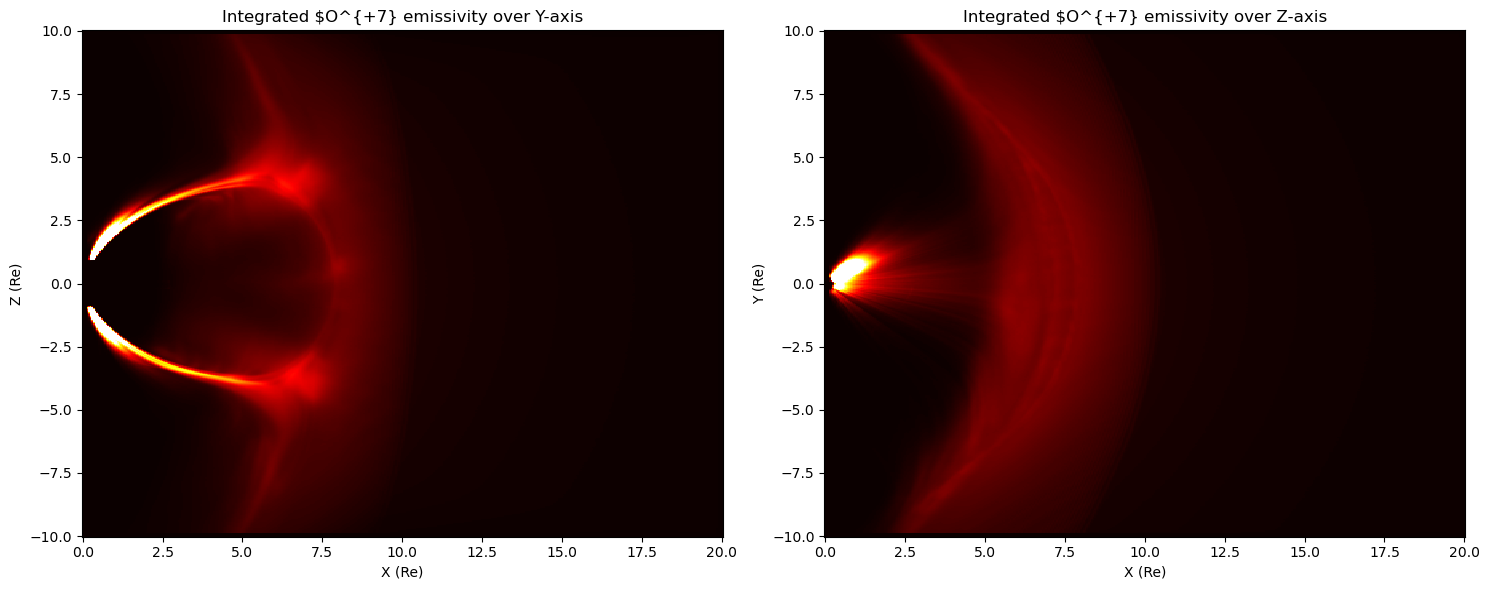

In [28]:
y_integration = cube.get_intengration(axis=1)
z_integration = cube.get_intengration(axis=2)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].pcolormesh(cube.x_GSE, cube.z_GSE,y_integration.T, cmap='hot',vmax =5e4)
axs[0].set_title("Integrated $O^{+7} emissivity over Y-axis")
axs[0].set_xlabel("X (Re)")
axs[0].set_ylabel("Z (Re)")
axs[1].pcolormesh(cube.x_GSE, cube.y_GSE,z_integration.T, cmap='hot',vmax =5e4)
axs[1].set_title("Integrated $O^{+7} emissivity over Z-axis")
axs[1].set_xlabel("X (Re)")
axs[1].set_ylabel("Y (Re)")
plt.tight_layout()
plt.show()